In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
_df = pd.read_csv('test.csv')
df.head(3)

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct


In [3]:
df.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [4]:
df.shape

(17176, 14)

In [5]:
df.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [6]:
df.isnull().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [7]:
df = df.fillna(df.mean())
_df = _df.fillna(_df.mean())

In [8]:
df.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from scipy import stats 

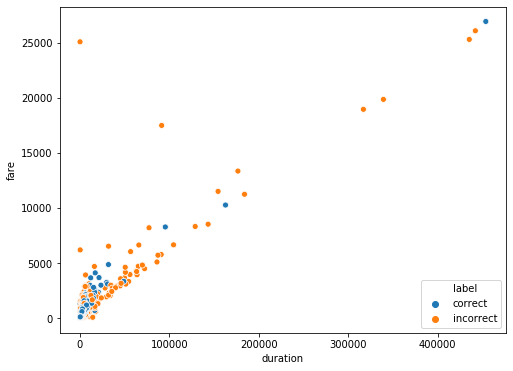

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='duration',y='fare',data=df, hue='label')
plt.show()

In [12]:
df2 = df[(np.abs(stats.zscore(df['duration'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['fare'])) < 3)]

In [13]:
df2 = df

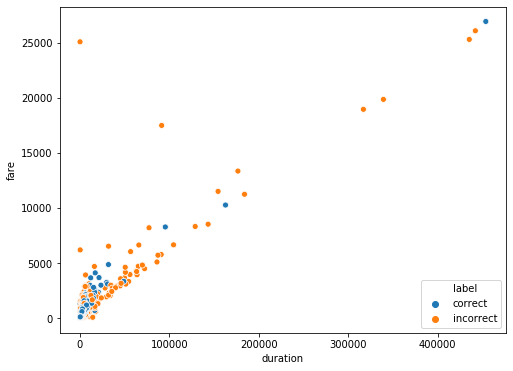

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='duration',y='fare',data=df2, hue='label')
plt.show()

In [15]:
df2.shape

(17176, 14)

In [16]:
from sklearn import preprocessing

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
df2.head(3)

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct


In [19]:
df2['label'] = label_encoder.fit_transform(df2['label'])
df2.head(3)

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,0
1,189125358,10.5,791.0,47.0,0.0,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,0
2,189125719,10.5,1087.0,80.0,0.0,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,0


In [20]:
df2['pickup_time'] = pd.to_datetime(df2['pickup_time']).dt.hour
df2['drop_time'] = pd.to_datetime(df2['drop_time']).dt.hour
_df['pickup_time'] = pd.to_datetime(_df['pickup_time']).dt.hour
_df['drop_time'] = pd.to_datetime(_df['drop_time']).dt.hour

In [21]:
df2.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.500000,834.000000,56.000000,0.000000,64.000000,0,0,6.86252,79.8993,6.90330,79.8783,270.32,0
1,189125358,10.500000,791.000000,47.000000,0.000000,134.000000,0,1,6.88589,79.8984,6.91373,79.8923,197.85,0
2,189125719,10.500000,1087.000000,80.000000,0.000000,61.000000,1,1,6.90839,79.8651,6.93669,79.9146,301.64,0
3,189127273,10.500000,598.000000,271.000000,15.663800,68.000000,2,2,6.92570,79.8895,6.92748,79.8971,82.30,0
4,189128020,13.719651,1702.858077,629.074231,32.057666,112.466832,3,3,6.87441,79.8615,6.84478,79.9290,358.39,0


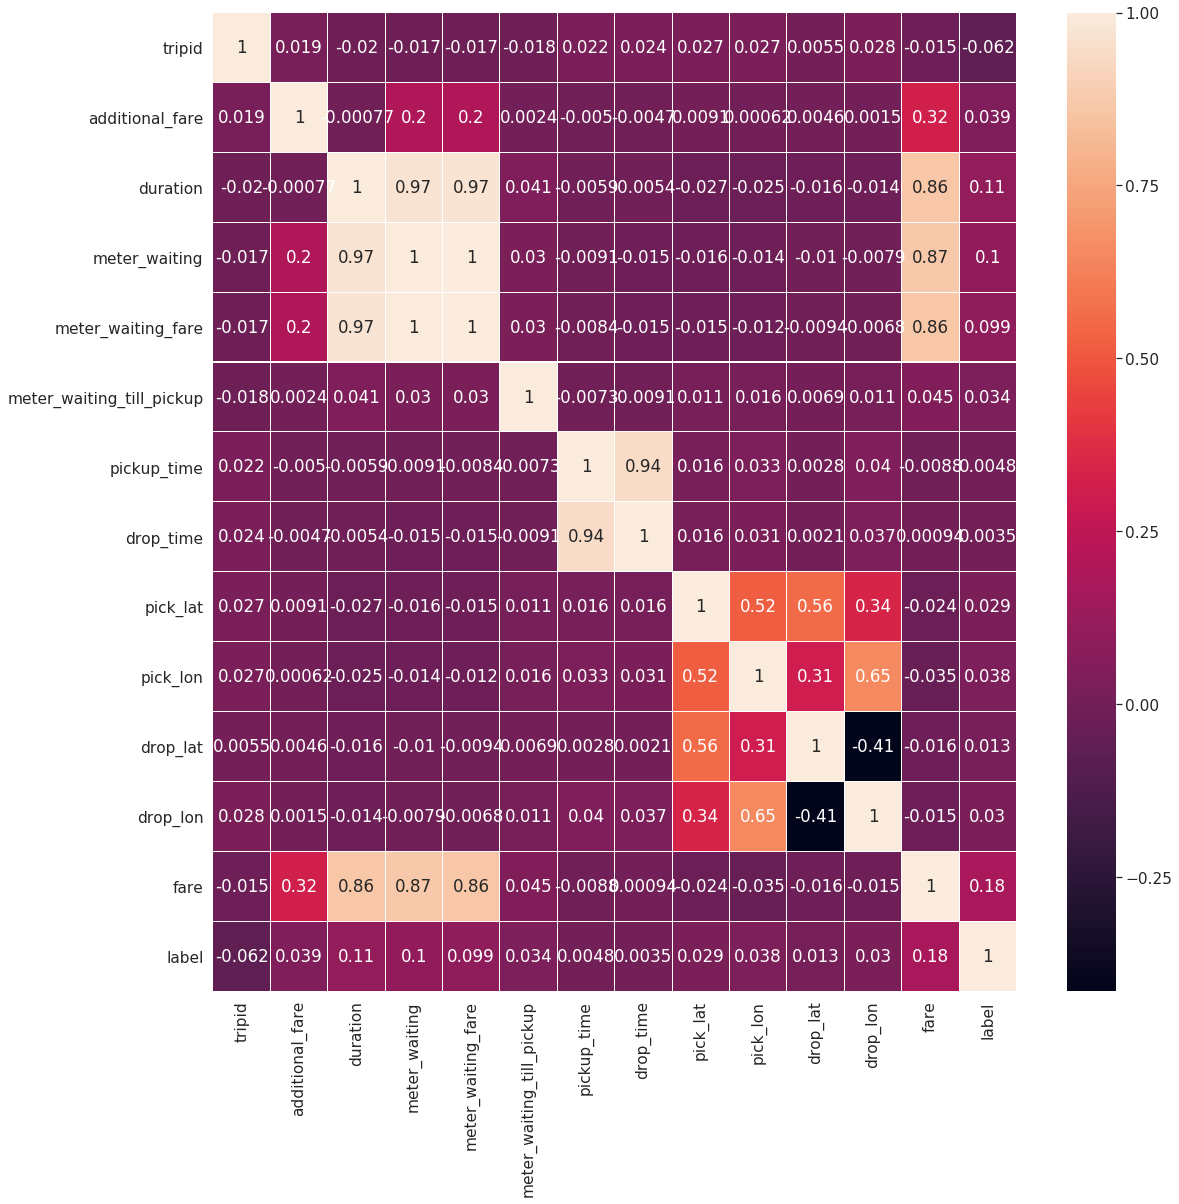

In [22]:
plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df2.corr(), annot = True ,linewidths=.1)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
y = df2['label']
train = df2.drop('label',1)
X_train, X_test, y_train, y_test = train[:int(len(train)*0.8)], train[int(len(train)*0.8):] , y[:int(len(y)*0.8)] , y[int(len(y)*0.8):]

In [24]:
X_train.drop('tripid',1).dtypes

additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                    int64
drop_time                      int64
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
dtype: object

In [25]:
_df.drop('tripid',1).dtypes

additional_fare              float64
duration                       int64
meter_waiting                  int64
meter_waiting_fare           float64
meter_waiting_till_pickup      int64
pickup_time                    int64
drop_time                      int64
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
dtype: object

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(max_depth=20)
model.fit(X_train.drop('tripid',1), y_train)
predictions = model.predict(X_test.drop('tripid',1))
# cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

0.9447031431897556


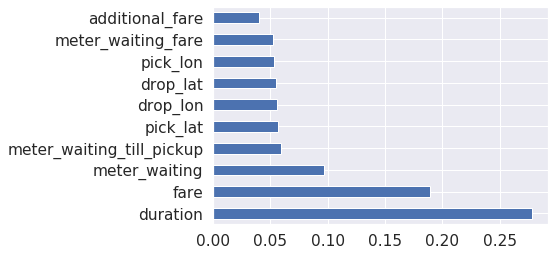

In [27]:
importance = model.feature_importances_
feat_importances_act = pd.Series(importance, index=X_test.drop('tripid',1).columns)
feat_importances = feat_importances_act.nlargest(10)
feat_importances.plot(kind='barh')

No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.916


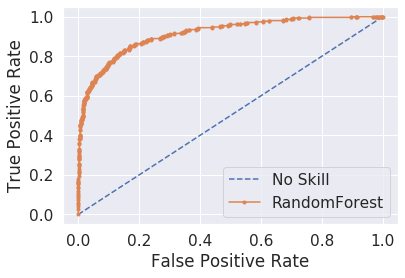

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test.drop('tripid',1))
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RandomForest: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [29]:
X_test.to_csv("testtt.csv")

In [30]:
result = model.predict(_df.drop('tripid',1))

In [31]:
result2 = np.logical_xor(result,1).astype(int)

In [32]:
submission  = pd.DataFrame(_df, columns = ['tripid'])

In [33]:
submission['prediction'] = result2

In [34]:
submission.to_csv('submission.csv', index=False)

## Trygin other models as well

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.910360884749709
Decision Tree Classification : 0.9112339930151339
Random Forest Classification : 0.9435389988358557
Gradient Boosting Classification : 0.9365541327124564
Ada Boosting Classification : 0.9126891734575088
Extra Tree Classification : 0.9281140861466822
K-Neighbors Classification : 0.910360884749709
Support Vector Classification : 0.910360884749709
Gaussian Naive Bayes : 0.9112339930151339
